<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# Classification with Python

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

*   Confidently create classification models


<i><b>MY NOTES PLEASE READ FIRST</b></i>

<i>Given some ambiguity in the assignment description and notebook, I had to make certain decisions in the course of analyzing the data. I list these decisions below:</i>

(1) I predicted whether a team made it to <b>F4 or not</b>.

This seems to be what the question wants, so I focus on a binary outcome: F4 or not-F4. Trying to sort teams into different classes (e.g., S16 vs. E8 vs. F4) is also interesting, but I am treating that as beyond the scope of the assignment. I created an outcome variable <b>F4</b> with 1 for teams that made it to F4 and 0 for teams that did not.
    
(2) I included <b>2ND and Champions</b> as teams that made it to F4.

Presumably to get to 2nd place or to win the whole tournament, they also had to be in the Final Four. The notebook is a little unclear--at one point they note that 8 teams in the dataset made it to the final four, but this does not include 2ND or Champion teams. I remade the POSTSEASON variable to label 2ND and Champion teams as F4, for a total of 16 teams labeled F4 in the dataset. 
    
(3) I used all of the data, <b>not just</b> the data for teams in S16, E8, and F4.

At one point, the notebook asks us to make a data frame that just has S16, E8, and F4. It is unclear if the assignment expects us to use this reduced data frame from that point out or the whole dataset. Later in the text of the notebook, all of the categories are mentioned ("What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64..."). Given that the assignment is to figure out the likelihood a team makes it to F4 and not specifically "Did a team make it to F4 after already making it to S16?", I used the full dataset.
    
(4) I used a <b>50-50</b> test-train split. 

So few teams make it to F4 compared to the number of teams that do. The data is already so heavily unbalanced between F4 and Not-F4 outcomes, that I wanted to make sure there was a decent number of F4 teams in the test set.

I have a few more Markdown notes throughout the project.

<i><b>Now back to the project...</b></i>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [652]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['matplotlib'])
await piplite.install(['pandas'])

In [653]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about the performance of basketball teams. The **cbb.csv** data set includes performance data about five seasons of 354 basketball teams. It includes the following fields:

| Field      | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ---------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| TEAM       | The Division I college basketball school                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| CONF       | The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference) |
| G          | Number of games played                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| W          | Number of games won                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| ADJOE      | Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ADJDE      | Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BARTHAG    | Power Rating (Chance of beating an average Division I team)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| EFG_O      | Effective Field Goal Percentage Shot                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EFG_D      | Effective Field Goal Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| TOR        | Turnover Percentage Allowed (Turnover Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| TORD       | Turnover Percentage Committed (Steal Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| ORB        | Offensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| DRB        | Defensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| FTR        | Free Throw Rate (How often the given team shoots Free Throws)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| FTRD       | Free Throw Rate Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| 2P_O       | Two-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| 2P_D       | Two-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| 3P_O       | Three-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| 3P_D       | Three-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| ADJ_T      | Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| WAB        | Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| POSTSEASON | Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| SEED       | Seed in the NCAA March Madness Tournament                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| YEAR       | Season                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |


### Load Data From CSV File


Let's load the dataset \[NB Need to provide link to csv file]


In [654]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv"
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())
await download(path, "cbb.csv")
            

In [655]:
df = pd.read_csv("cbb.csv")
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [656]:
df.shape

(1406, 24)

## Add Column

Next we'll add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex" for short.


In [657]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,True
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016,True
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True


In [658]:
#create outcome variable POSTSEASON2 that groups Champions and 2nd in with F4; drop NaNs
df['POSTSEASON2'] = np.where(df.POSTSEASON == 'Champions','F4', df['POSTSEASON'])
df['POSTSEASON2'] = np.where(df.POSTSEASON == '2ND','F4', df['POSTSEASON2'])
df = df.loc[df['POSTSEASON2'].str.contains('F4|S16|E8|R32|R64|R68', na=False)]
df[0:10]

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex,POSTSEASON2
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,True,F4
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016,True,F4
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False,E8
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True,E8
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True,E8
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False,E8
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False,F4
7,Oklahoma,B12,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,...,45.3,42.2,33.7,70.8,8.0,F4,2.0,2016,True,F4
291,Saint Joseph's,A10,36,28,114.2,97.6,0.8600,51.2,48.1,14.3,...,49.2,32.7,31.1,70.9,3.4,R32,8.0,2016,False,R32
292,VCU,A10,36,25,112.1,94.2,0.8811,51.0,49.2,16.3,...,48.6,35.2,33.7,70.3,-0.1,R32,10.0,2016,False,R32


In [659]:
#create outcome variable that predicts binary outcome--F4 or not
df['F4'] = np.where(df.POSTSEASON2 == 'F4', 1, 0)
print (df.head(10))
print (df.shape)
print (df.dtypes)

               TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0    North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1         Villanova   BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2        Notre Dame  ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3          Virginia  ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4            Kansas  B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   
5            Oregon  P12  37  30  118.4   96.2   0.9163   52.3   48.9  16.1   
6          Syracuse  ACC  37  23  111.9   93.6   0.8857   50.0   47.3  18.1   
7          Oklahoma  B12  37  29  118.2   94.1   0.9326   54.3   47.2  18.3   
291  Saint Joseph's  A10  36  28  114.2   97.6   0.8600   51.2   48.1  14.3   
292             VCU  A10  36  25  112.1   94.2   0.8811   51.0   49.2  16.3   

     ...  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  windex  \
0    ...  32.7  36.2   71.7   8.6         2ND   1.0  2016    

# Data visualization and pre-processing


Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season. We'll also create a new dataframe that will hold the values with the new column.


In [660]:
#Again, assuming teams that are second place and champions also made it to F4

df1 = df.loc[df['POSTSEASON'].str.contains('Champions|2ND|F4|S16|E8', na=False)]
df1['POSTSEASON'] = np.where(df1.POSTSEASON == 'Champions','F4', df1['POSTSEASON'])
df1['POSTSEASON'] = np.where(df1.POSTSEASON == '2ND','F4', df1['POSTSEASON'])
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex,POSTSEASON2,F4
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,32.7,36.2,71.7,8.6,F4,1.0,2016,True,F4,1
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,36.2,33.9,66.7,8.9,F4,2.0,2016,True,F4,1
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,37.4,36.9,65.5,2.3,E8,6.0,2016,False,E8,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,40.3,34.7,61.9,8.6,E8,1.0,2016,True,E8,0
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,41.3,32.5,70.1,11.6,E8,1.0,2016,True,E8,0


In [661]:
df1['POSTSEASON'].value_counts()

S16    32
F4     16
E8     16
Name: POSTSEASON, dtype: int64

32 teams made it into the Sweet Sixteen, 16 into the Elite Eight, and 8 made it into the Final Four over 5 seasons.


<b>My note:</b> A total of 16 made it to the Final Four if we include 2ND and Champions in F4.

Lets plot some columns to underestand the data better:


In [663]:
# notice: installing seaborn might takes a few minutes
await piplite.install(['seaborn'])

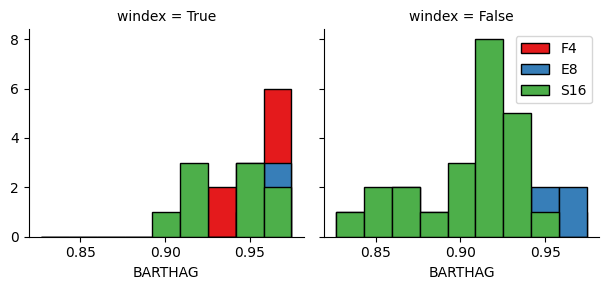

In [664]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

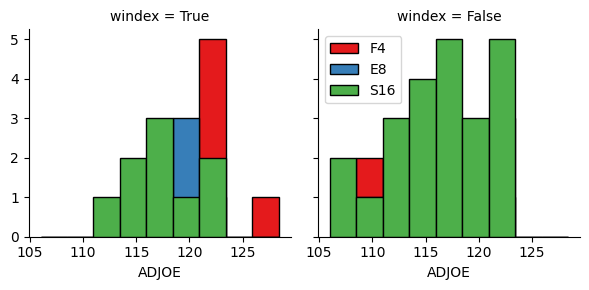

In [665]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at how Adjusted Defense Efficiency plots


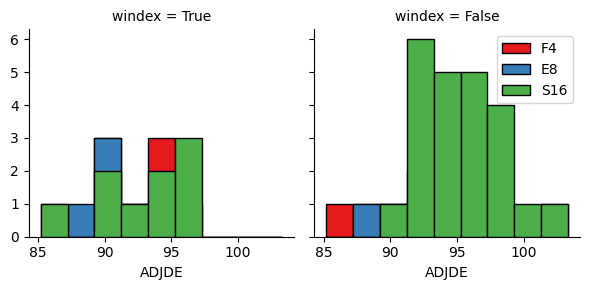

In [666]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that this data point doesn't impact the ability of a team to get into the Final Four.


## Convert Categorical features to numerical values


Lets look at the postseason:


In [ ]:
#Switching back to FULL DATASET here, keeping 2ND and Champions in F4

df.groupby(['windex'])['POSTSEASON2'].value_counts(normalize=True)

13% of teams with 6 or less wins above bubble make it into the final four while 17% of teams with 7 or more do.


<i><b>My note:</b> If we include champions/2nd in F4 then it's 3% and 26%, respectively.</i>

Lets convert wins above bubble (winindex) under 7 to 0 and over 7 to 1:


In [668]:
import warnings
warnings.filterwarnings('ignore')
df['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex,POSTSEASON2,F4
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,32.7,36.2,71.7,8.6,2ND,1.0,2016,1,F4,1
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,36.2,33.9,66.7,8.9,Champions,2.0,2016,1,F4,1
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,37.4,36.9,65.5,2.3,E8,6.0,2016,0,E8,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,40.3,34.7,61.9,8.6,E8,1.0,2016,1,E8,0
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,41.3,32.5,70.1,11.6,E8,1.0,2016,1,E8,0


### Feature selection


Let's define feature sets, X:


In [669]:
X = df[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,...,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,1.0,1
1,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,20.6,28.2,...,34.1,30.0,57.4,44.1,36.2,33.9,66.7,8.9,2.0,1
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1


What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|


<i><b>My note:</b> Please note the text above suggests we are supposed to use all of the data, even though the sample code refers to df1, which we created to only have a subset of the data; as noted above, I have chosen to use all of the data.</i>

In [783]:
y = df['F4'].values
y[0:100]

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Normalize Data


Data Standardization gives data zero mean and unit variance (technically should be done after train test split )


In [671]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 2.62,  1.98,  1.77, -0.46,  0.92, -0.05, -0.08, -1.1 , -0.27,
         2.42,  0.63, -0.64, -0.38,  0.72, -0.95, -1.41,  1.35,  0.99,
         1.43, -1.67,  2.65],
       [ 2.62,  2.47,  1.74, -1.25,  1.02,  1.31, -0.7 , -0.56,  0.79,
        -0.62,  0.41, -0.26, -0.45,  1.93, -1.13,  0.01,  0.24, -0.79,
         1.49, -1.45,  2.65],
       [ 0.78, -0.19,  0.98,  1.19,  0.2 ,  0.49,  0.53, -1.16, -1.77,
         0.48,  1.37, -0.52, -1.17,  0.37, -0.28,  0.49,  1.69, -1.21,
         0.17, -0.6 , -0.38],
       [ 1.24,  1.01,  1.23, -1.23,  0.96,  0.81,  0.05, -1.28, -0.01,
        -0.2 , -1.08, -0.68,  0.16,  0.27, -0.35,  1.66,  0.63, -2.49,
         1.43, -1.67,  2.65],
       [ 1.24,  1.74,  1.39, -1.35,  1.  ,  1.16, -1.4 ,  0.34, -0.14,
         0.35, -0.12,  0.68,  0.86,  0.3 , -1.38,  2.07, -0.43,  0.42,
         2.03, -1.67,  2.65]])

## Training and Validation


Split the data into Training and Validation data.


In [682]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (136, 21) (136,)
Validation set: (136, 21) (136,)


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the validation set  to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression


# K Nearest Neighbor(KNN)

<b>Question  1 </b> Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)


You can use <code> accuracy_score</cdoe>


In [683]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#train model
k = 5
knn5 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

#test model
yhat5 = knn5.predict(X_val)
yhat5[0:5]

#accuracy 
print("Train set accuracy:", metrics.accuracy_score(y_train, knn5.predict(X_train)))
print("Validation set accuracy", metrics.accuracy_score(y_val, yhat5))

Train set accuracy: 0.9558823529411765
Validation set accuracy 0.9264705882352942


<b>Question  2</b> Determine and print the accuracy for the first 15 values of k on the validation data:


f1 score-training set (k = 1 ) = [1. 1.]
f1 score-validation set (k = 1 ) = [0.96 0.15]
f1 score-training set (k = 2 ) = [0.98 0.29]
f1 score-validation set (k = 2 ) = [0.96 0.  ]
f1 score-training set (k = 3 ) = [0.98 0.29]
f1 score-validation set (k = 3 ) = [0.96 0.  ]
f1 score-training set (k = 4 ) = [0.98 0.  ]
f1 score-validation set (k = 4 ) = [0.96 0.  ]
f1 score-training set (k = 5 ) = [0.98 0.  ]
f1 score-validation set (k = 5 ) = [0.96 0.  ]
f1 score-training set (k = 6 ) = [0.98 0.  ]
f1 score-validation set (k = 6 ) = [0.96 0.  ]
f1 score-training set (k = 7 ) = [0.98 0.  ]
f1 score-validation set (k = 7 ) = [0.96 0.  ]
f1 score-training set (k = 8 ) = [0.98 0.  ]
f1 score-validation set (k = 8 ) = [0.96 0.  ]
f1 score-training set (k = 9 ) = [0.98 0.  ]
f1 score-validation set (k = 9 ) = [0.96 0.  ]
f1 score-training set (k = 10 ) = [0.98 0.  ]
f1 score-validation set (k = 10 ) = [0.96 0.  ]
f1 score-training set (k = 11 ) = [0.98 0.  ]
f1 score-validation set (k = 11 ) = 

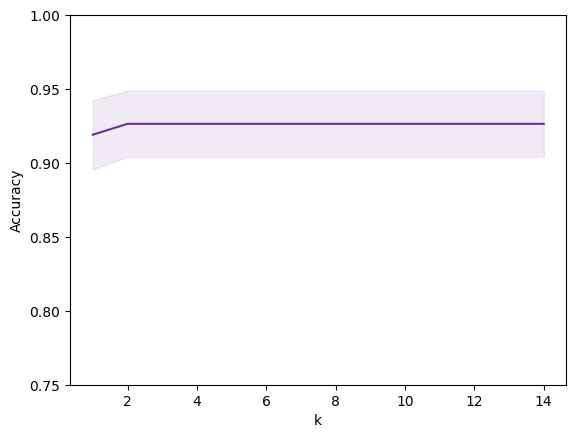

In [684]:
##choosing k

#setup
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

knn2.predict(X_train)

#train and test
for n in range(1, Ks):
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = knn.predict(X_val)
    mean_acc[n-1] = metrics.accuracy_score(y_val, yhat)
    std_acc[n-1] = np.std(yhat == y_val)/np.sqrt(yhat.shape[0])
    print("f1 score-training set (k =",n, ") =", metrics.f1_score(y_train, knn.predict(X_train), average=None))
    print("f1 score-validation set (k =",n, ") =", metrics.f1_score(y_val, yhat, average=None))
    
#print accuracy for first 15 values of k  
print("The accuracy for each value of k 1-15 is",mean_acc)
print("The best accuracy was", mean_acc.max(), "when k = ", mean_acc.argmax()+1, "(lowest k returned in case of ties)")

#plot results
plt.plot(range(1, Ks), mean_acc, color = "rebeccapurple")
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10, color = "rebeccapurple")
plt.ylim(.75, 1)
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.show()

#KNN DOESN’T ACTUALLY RETURN MODEL PARAMETERS SO NOT USEFUL FOR THINKING ABOUT IDEAS

In [685]:
#knn2 model

#train model
k = 2
knn2 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

#test model
yhat2 = knn2.predict(X_val)
yhat5[0:5]

#accuracy 
print("Train set accuracy:", metrics.accuracy_score(y_train, knn2.predict(X_train)))
print("Train set f1 score:", metrics.f1_score(y_train, knn2.predict(X_train), average = None))
print("Validation set accuracy", metrics.accuracy_score(y_val, yhat2))
print("Validation f1 score = ", metrics.f1_score(y_val, yhat2, average=None))

#I have a feeling that this one isn't going to win.

Train set accuracy: 0.9632352941176471
Train set f1 score: [0.98 0.29]
Validation set accuracy 0.9264705882352942
Validation f1 score =  [0.96 0.  ]


# Decision Tree


The following lines of code fit a <code>DecisionTreeClassifier</code>:


In [692]:
from sklearn.tree import DecisionTreeClassifier

<b>Question  3</b> Determine the minumum   value for the parameter <code>max_depth</code> that improves results


In [693]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#LOOP
#train and test
k = 15
mean_acc = np.zeros((k-1))

for n in range(1, k):
    tree = DecisionTreeClassifier(criterion = "entropy", max_depth = n).fit(X_train, y_train)
    predTree = tree.predict(X_val)
    mean_acc[n-1] = metrics.accuracy_score(y_val, predTree)

#print accuracy for first 15 values of k  
print("The accuracy for each value of max_depth 1-10 is",mean_acc)
print("The best accuracy was", mean_acc.max(), "when max_depth = ", mean_acc.argmax()+1)

The accuracy for each value of max_depth 1-10 is [0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.95 0.95 0.96 0.95 0.96 0.96 0.96]
The best accuracy was 0.9632352941176471 when max_depth =  1


In [688]:
#Again, I am intentionally including 2nd and Champions in F4 because they by definition reached F4 at one point
df['F4_str'] = np.where(df.F4 == 1, 'F4', 'NotF4')
df.groupby(['F4'])['F4_str'].value_counts(normalize=False)

#This really emphasizes the need to check accuracy for both 1s(F4) and 0s (non-F4) since the data is so imbalanced

F4  F4_str
0   NotF4     256
1   F4         16
Name: F4_str, dtype: int64

Accuracy =  0.9632352941176471


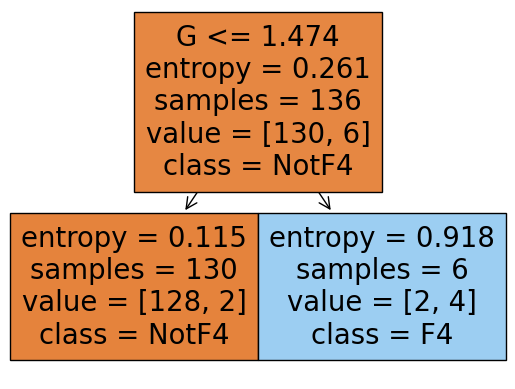

Accuracy =  0.9558823529411765


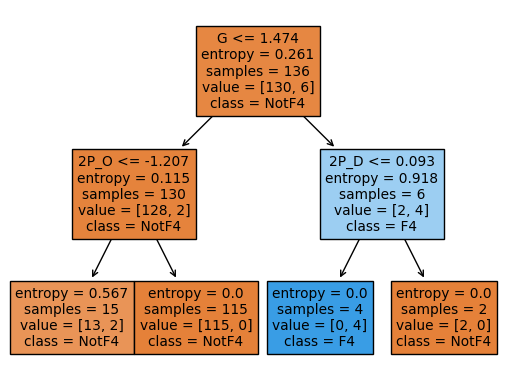

In [694]:
#VISUALIZATION 1
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#for column names
dfcol = df.drop(columns=['TEAM', 'CONF', 'POSTSEASON', 'YEAR', 'POSTSEASON2', 'F4'])

tree1 = DecisionTreeClassifier(criterion = "entropy", max_depth = 1)
tree1.fit(X_train, y_train)
predTree1 = tree1.predict(X_val)
print("Accuracy = ", metrics.accuracy_score(y_val, predTree1))
#tree.plot_tree(tree1, feature_names = dfcol.columns, class_names = ["E8", "F4", "S16"], filled = True)
tree.plot_tree(tree1, feature_names = dfcol.columns, class_names = ["NotF4", "F4"], filled = True)
plt.show()

tree2 = DecisionTreeClassifier(criterion = "entropy", max_depth = 2)
tree2.fit(X_train, y_train)
predTree2 = tree2.predict(X_val)
print("Accuracy = ", metrics.accuracy_score(y_val, predTree2))
#tree.plot_tree(tree2, feature_names = dfcol.columns, class_names = ["E8", "F4", "S16"], filled = True)
tree.plot_tree(tree2, feature_names = dfcol.columns, class_names = ["NotF4", "F4"], filled = True)
plt.show()

#according to the above, the max_depth with highest accuracy is 1 or 2, but neither of these leads to all pure leaves

max_depth =  1
Accuracy =  0.9632352941176471
f1 =  [0.98 0.76]


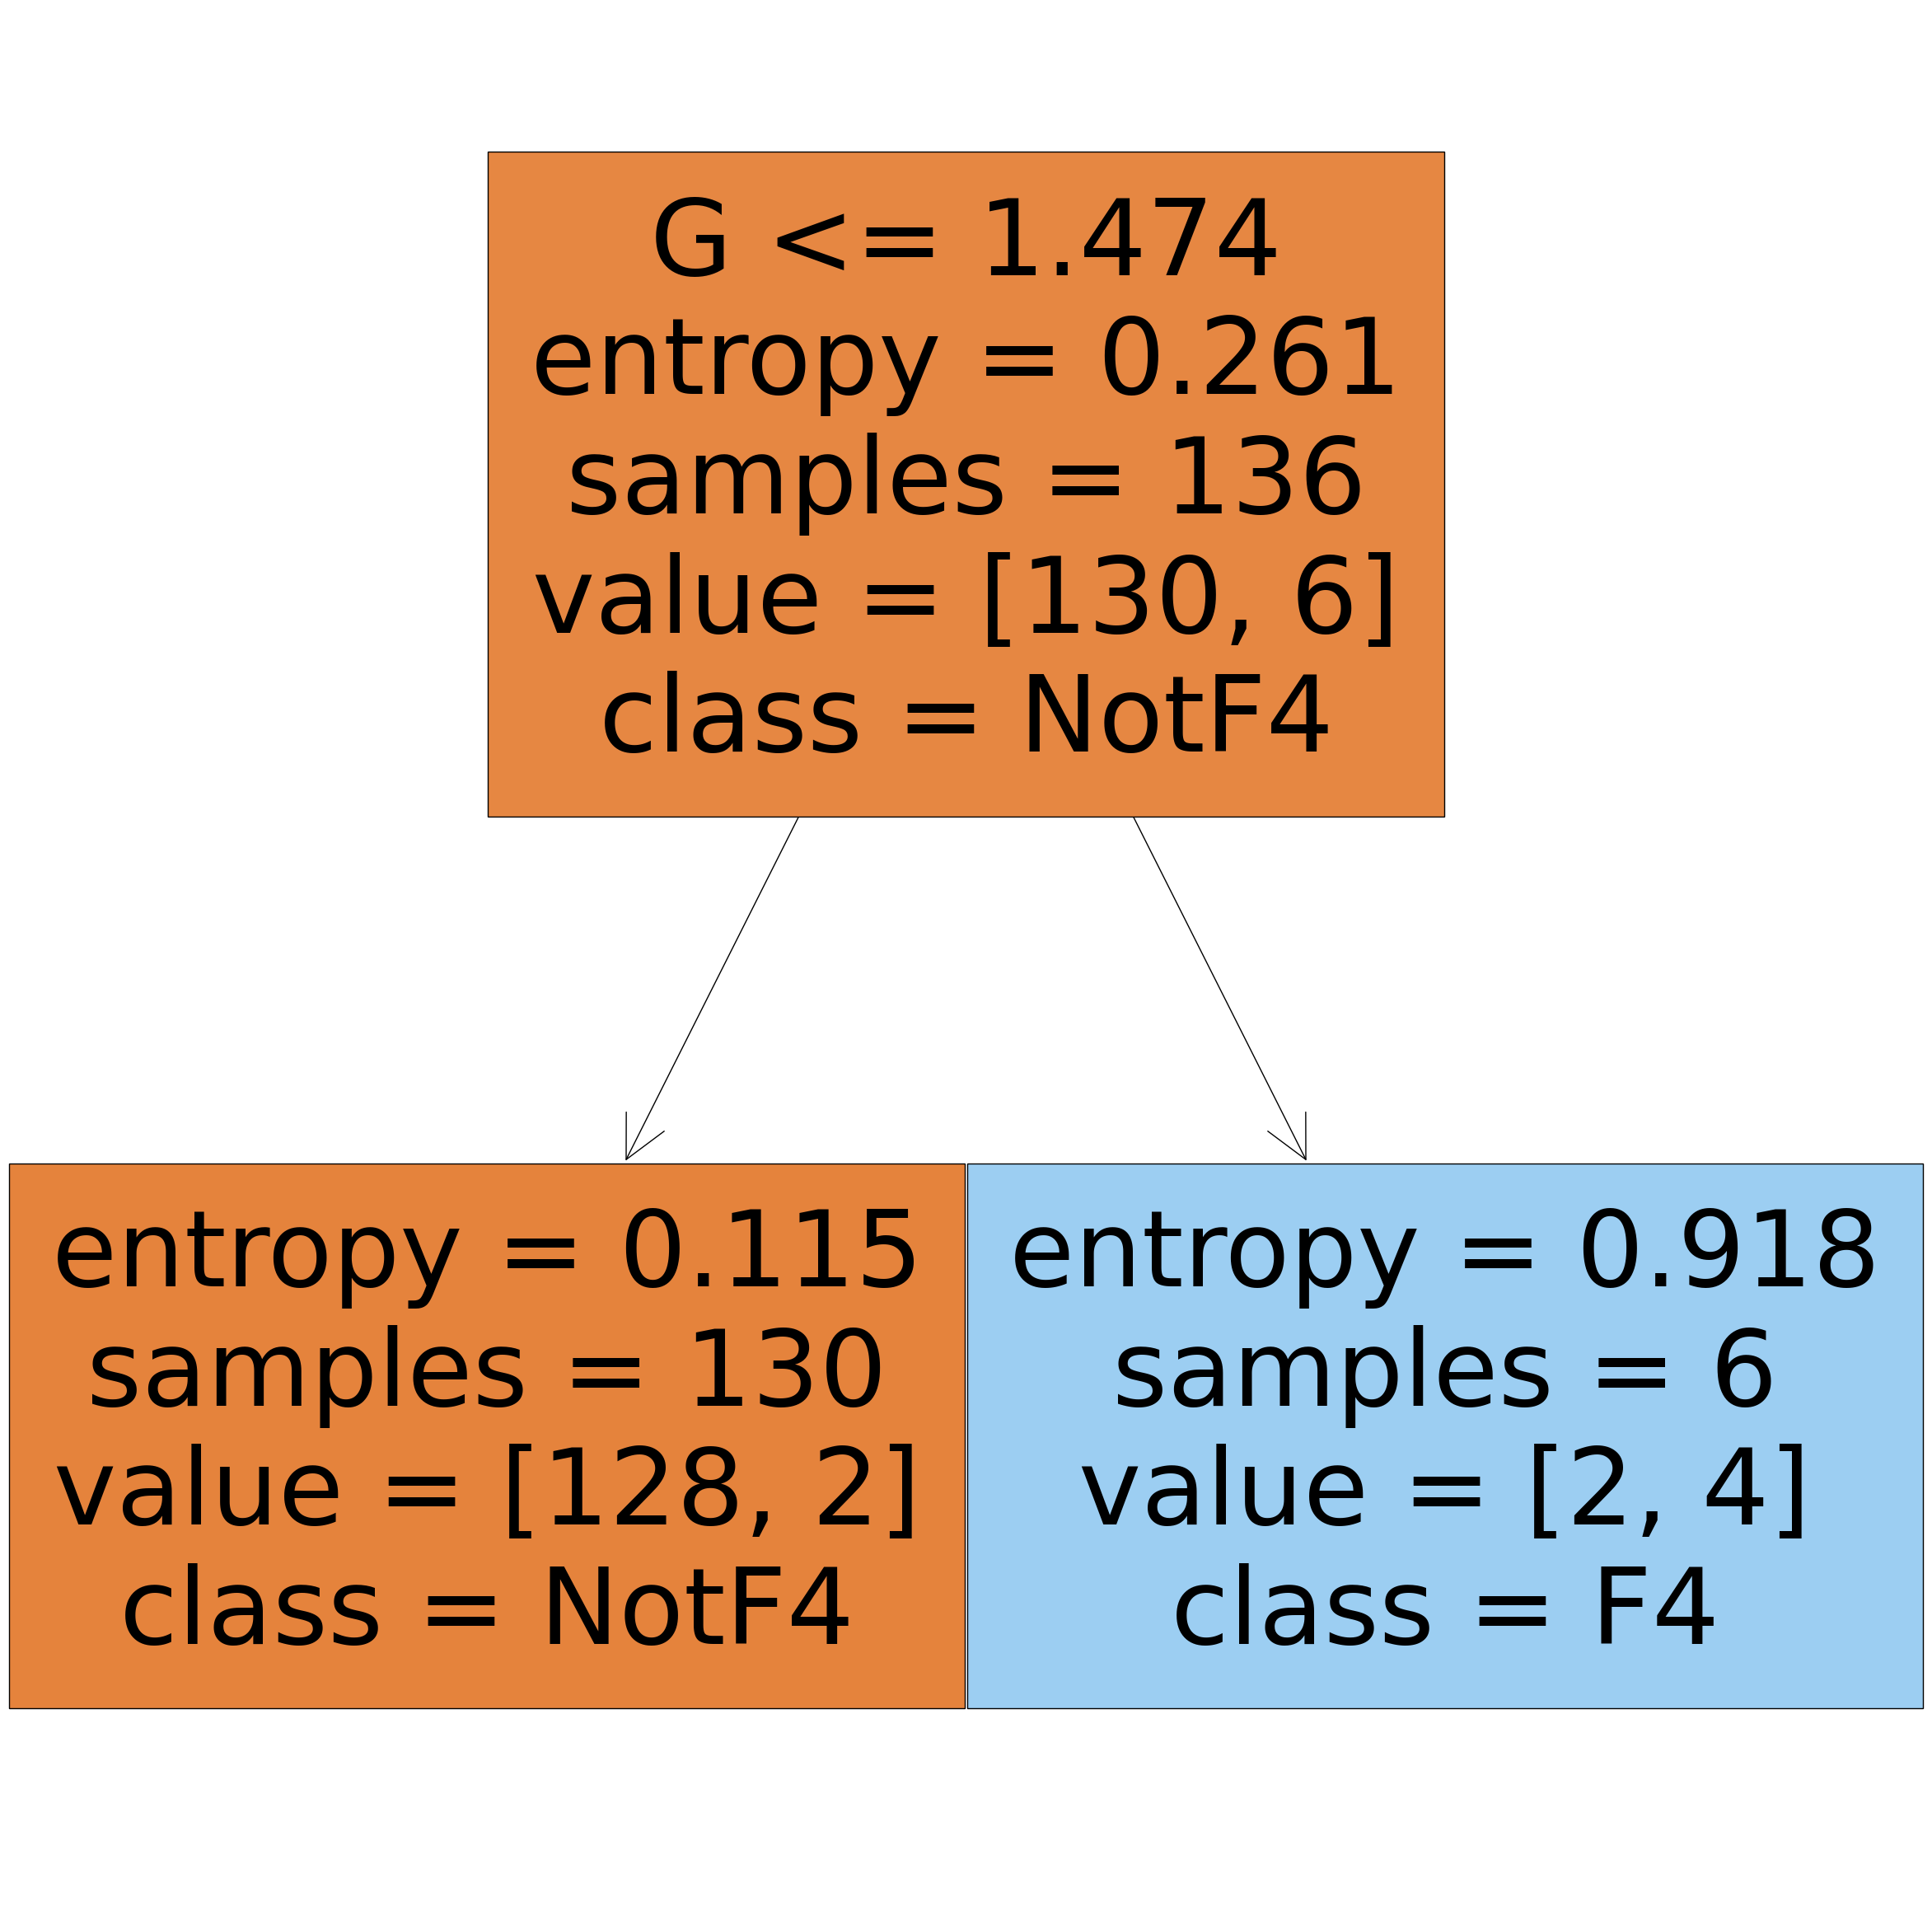

max_depth =  2
Accuracy =  0.9558823529411765
f1 =  [0.98 0.62]


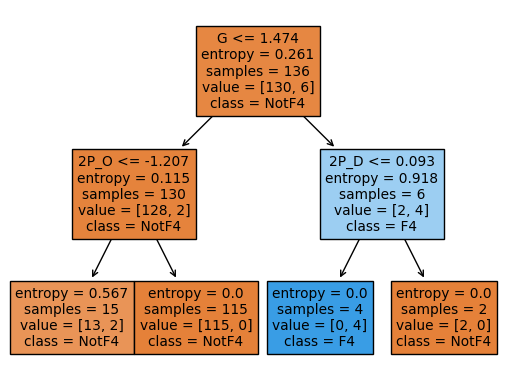

max_depth =  3
Accuracy =  0.9558823529411765
f1 =  [0.98 0.67]


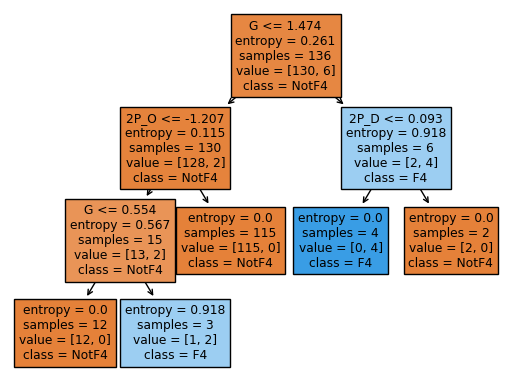

max_depth =  4
Accuracy =  0.9632352941176471
f1 =  [0.98 0.71]


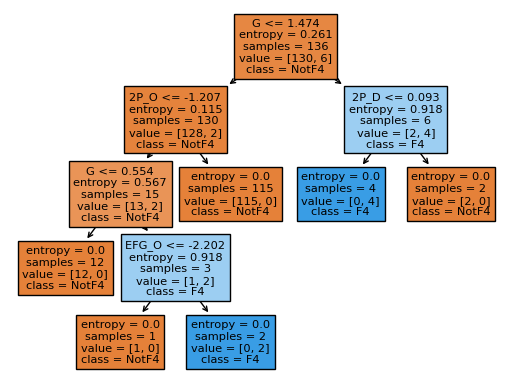

max_depth =  5
Accuracy =  0.9485294117647058
f1 =  [0.97 0.59]


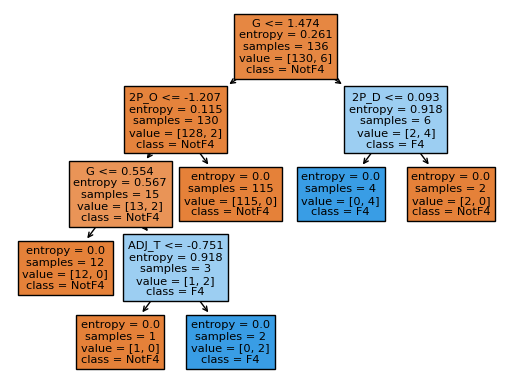

max_depth =  6
Accuracy =  0.9632352941176471
f1 =  [0.98 0.71]


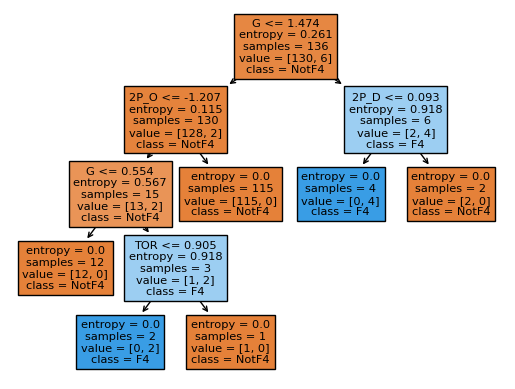

max_depth =  7
Accuracy =  0.9632352941176471
f1 =  [0.98 0.71]


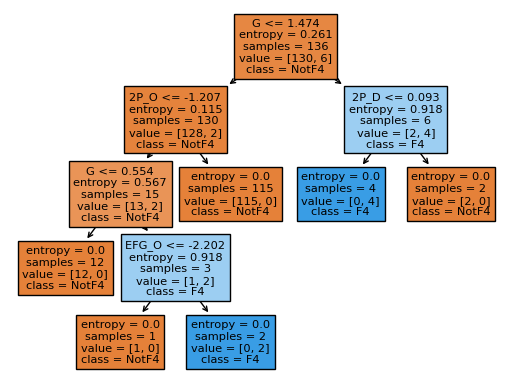

max_depth =  8
Accuracy =  0.9632352941176471
f1 =  [0.98 0.71]


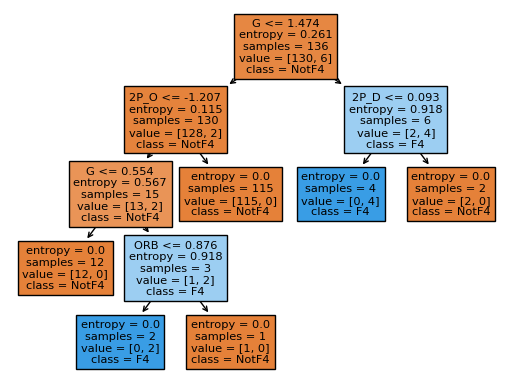

max_depth =  9
Accuracy =  0.9632352941176471
f1 =  [0.98 0.71]


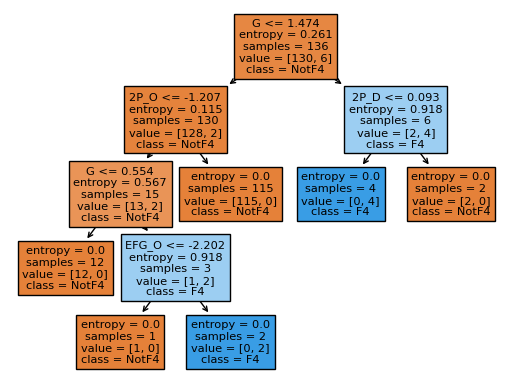

In [695]:
#VISUALIZATION 2
#plots all trees in range, takes up a lot of memory so clear before saving

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

plt.figure(figsize = (30, 30))

k = 10

for n in range(1, k):
    treej = DecisionTreeClassifier(criterion = "entropy", max_depth = n).fit(X_train, y_train)
    print("max_depth = ", n)
    predTreej = treej.predict(X_val)
    print("Accuracy = ", metrics.accuracy_score(y_val, predTreej))
    print("f1 = ", metrics.f1_score(y_val, predTreej, average=None)) 
    #tree.plot_tree(treej, feature_names = dfcol.columns, class_names = ["E8", "F4", "S16"], filled = True)
    tree.plot_tree(treej, feature_names = dfcol.columns, class_names = ["NotF4", "F4"], filled = True)
    plt.show()

<i><b>My Note:</b>Looks like the <b>max depth = 4 model</b> gets us to all pure leaves the most quickly, while still being highly accurate (and even does a decent job of accuracy on predicting F4, not just predicting Not-F4). So we will adopt this as our final decision tree model.</i>

Accuracy =  0.9632352941176471


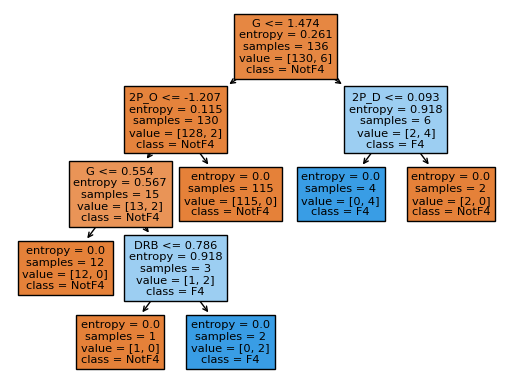

In [696]:
#maxdepth4 model

tree4 = DecisionTreeClassifier(criterion = "entropy", max_depth = 4).fit(X_train, y_train)
predTree4 = tree4.predict(X_val)
print("Accuracy = ", metrics.accuracy_score(y_val, predTree4))
tree.plot_tree(tree4, feature_names = dfcol.columns, class_names = ["NotF4", "F4"], filled = True)
plt.show()

<i>Let's sit back and look at some scatterplots plotting Postseason against the predictors used by winning model (max depth =4). Just to get a look at the data.</i>

(25.0, 45.0)

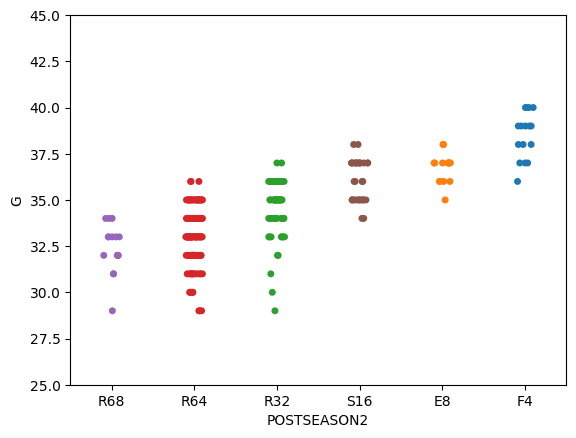

In [709]:
#scatterplot ordering the levels of the categorical variable--G

axg = sns.stripplot(data = df,
              x='POSTSEASON2', y='G', 
              order = ['R68', 'R64', 'R32','S16','E8','F4'],
              hue="POSTSEASON2", 
              jitter=True,
             legend = False)
axg.set_ylim([25,45])

<i>Clear <b>rising trend</b> going from R68 to F4--not surprising that the Decision Tree emphasized this factor.</i>

<i>Let's see how <b>G</b> predicts our actual outcome variable, F4 vs. NotF4.</i>

(25.0, 45.0)

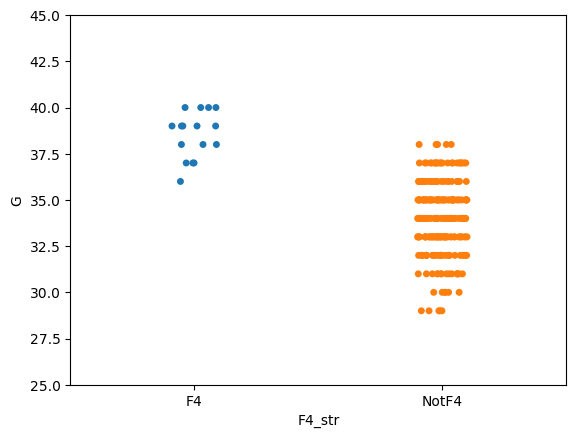

In [718]:
#scatterplot ordering the levels of the categorical variable-G

axgsmallest = sns.stripplot(data = df,
              x='F4_str', y='G', 
              order = ['F4', 'NotF4'],
              hue="F4_str", 
              jitter=True,
             legend = False)
axgsmallest.set_ylim([25, 45])

<i>So breaking news: number of goals seems like a clear predictor of how good a team is at basketball.</i>

<i>Let's try some more factors included in our Decision Tree model. Like <b>2P_O</b>.</i>

(35.0, 70.0)

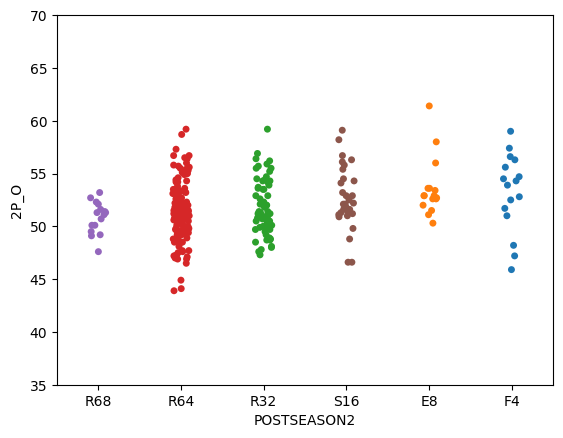

In [704]:
#scatterplot ordering the levels of the categorical variable--2P_O

ax2po = sns.stripplot(data = df,
              x='POSTSEASON2', y='2P_O', 
              order = ['R68', 'R64', 'R32','S16','E8','F4'],
              hue="POSTSEASON2", 
              jitter=True,
             legend = False)
ax2po.set_ylim([35,70])

(35.0, 70.0)

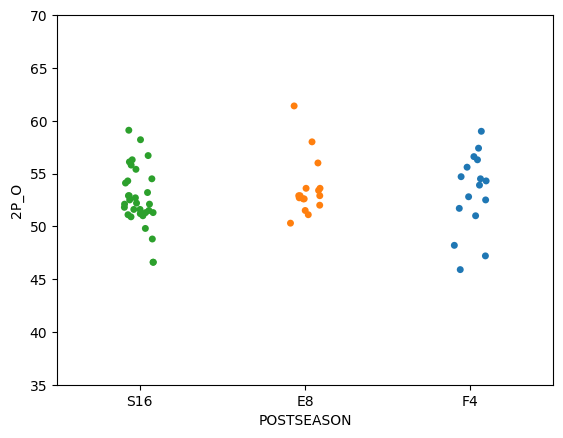

In [708]:
#scatterplot ordering the levels of the categorical variable--2P_O

ax_2posmall = sns.stripplot(data = df1,
              x='POSTSEASON', y='2P_O', 
              order = ['S16','E8','F4'],
              hue="POSTSEASON", 
              jitter=True,
             legend = False)
ax_2posmall.set_ylim([35,70])


<i>Weirdly, <b>2P_O</b> seems to maybe pick out R68 and maybe E8 but otherwise not do much? How good is this at predicting F4 vs. non-F4, our actual outcome variable?</i>

(35.0, 70.0)

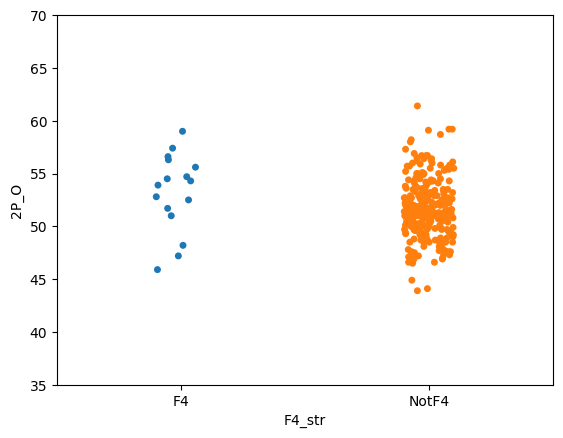

In [710]:
#scatterplot ordering the levels of the categorical variable-2P_O

ax2posmallest = sns.stripplot(data = df,
              x='F4_str', y='2P_O', 
              order = ['F4', 'NotF4'],
              hue="F4_str", 
              jitter=True,
             legend = False)
ax2posmallest.set_ylim([35,70])

<i>F4 clusters a little higher than non-F4 clusters but it's so hard to tell with the unbalanced amounts of 1s (F4s) and 0s (not F4s). You can see how models might overperform on predicting 0s and underperform on predicting 1s. </i>

<i>Let's look at another factor from our Decision Tree, <b>2P_D</b>.</i>

(35.0, 60.0)

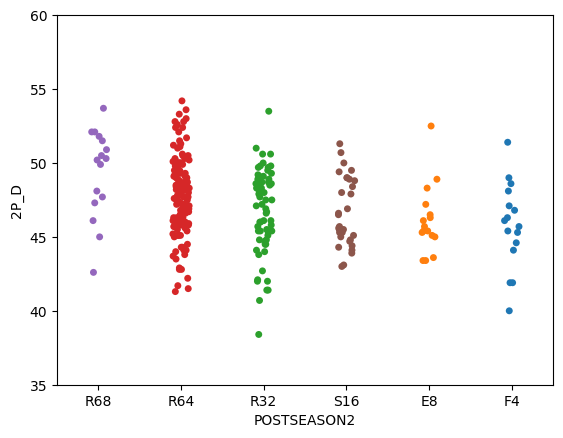

In [711]:
#scatterplot ordering the levels of the categorical variable-2P_D

ax2pd = sns.stripplot(data = df,
              x='POSTSEASON2', y='2P_D', 
              order = ['R68', 'R64', 'R32','S16','E8','F4'],
              hue="POSTSEASON2", 
              jitter=True,
             legend = False)
ax2pd.set_ylim([35,60])

<i>There does seem to be a downward trend for <b>2P_D</b>. How about F4 vs. non-F4?</i>

(30.0, 60.0)

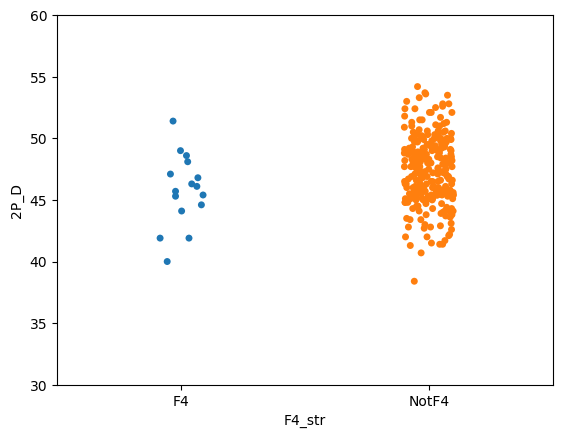

In [712]:
#scatterplot ordering the levels of the categorical variable-2P_D

ax2pdsmallest = sns.stripplot(data = df,
              x='F4_str', y='2P_D', 
              order = ['F4', 'NotF4'],
              hue="F4_str", 
              jitter=True,
             legend = False)
ax2pdsmallest.set_ylim([30, 60])

#Hard to identify where F4 is clustering--maybe around 45-50?

<i>Hard to tell just from the visualization, again due to the imbalanced amounts.</i>

<i>How about the last factor picked out by the Decision Tree, <b>DRB</b>?</i>

(20.0, 40.0)

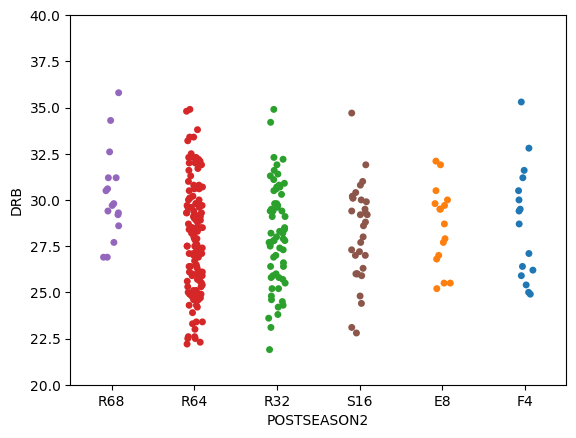

In [715]:
#scatterplot ordering the levels of the categorical variable-DRB

axdrb = sns.stripplot(data = df,
              x='POSTSEASON2', y='DRB', 
              order = ['R68', 'R64', 'R32','S16','E8','F4'],
              hue="POSTSEASON2", 
              jitter=True,
             legend = False)
axdrb.set_ylim([20,40])

(20.0, 40.0)

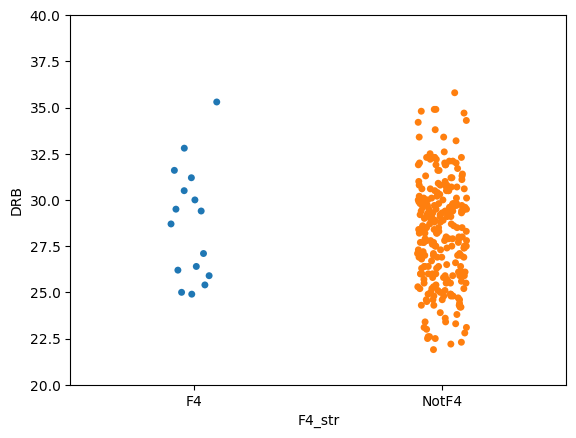

In [717]:
#scatterplot ordering the levels of the categorical variable-2P_D

axdrbsmallest = sns.stripplot(data = df,
              x='F4_str', y='DRB', 
              order = ['F4', 'NotF4'],
              hue="F4_str", 
              jitter=True,
             legend = False)
axdrbsmallest.set_ylim([20, 40])

<i>We can certainly see why <b>Goals</b> was the first factor in the decision tree. The remaining factors are less obvious from the scatterplots, but may make sense once goals are accounted for (which the decision tree does but we can't see from these scatterplots).</i>

<i>Back to modeling!</i>

# Support Vector Machine


<b>Question  4</b> Train the support  vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.

In [719]:
from sklearn import svm
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex,POSTSEASON2,F4,F4_str
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,36.2,71.7,8.6,2ND,1.0,2016,1,F4,1,F4
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,33.9,66.7,8.9,Champions,2.0,2016,1,F4,1,F4
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,36.9,65.5,2.3,E8,6.0,2016,0,E8,0,NotF4
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,34.7,61.9,8.6,E8,1.0,2016,1,E8,0,NotF4
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,32.5,70.1,11.6,E8,1.0,2016,1,E8,0,NotF4


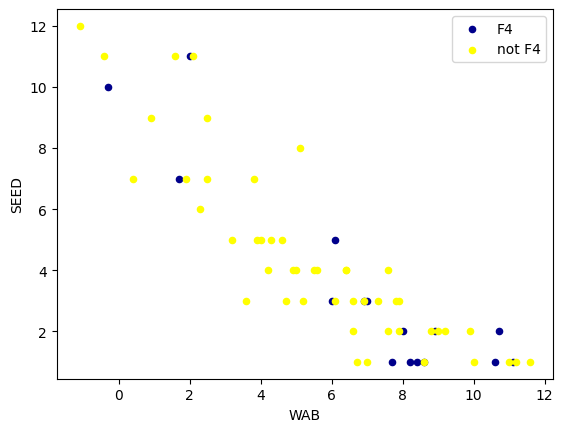

In [720]:
#scatterplot of seed vs. wins-above-bubble for F4 vs. non-F4 teams
ax = df1[df1['POSTSEASON'] == "F4"][0:50].plot(kind='scatter', x='WAB', y='SEED', color='DarkBlue', label='F4');
df1[df1['POSTSEASON'] != "F4"][0:50].plot(kind='scatter', x='WAB', y='SEED', color='Yellow', label='not F4', ax=ax);
plt.show()

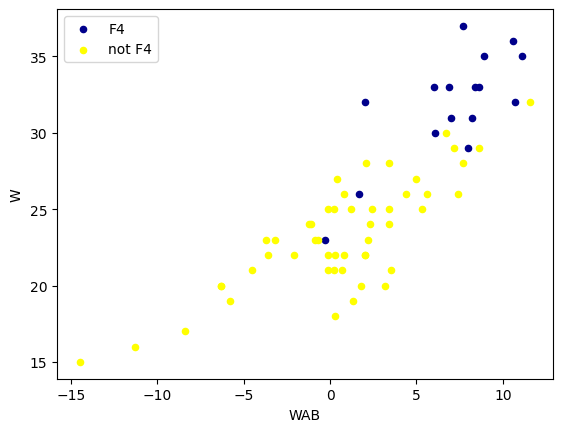

In [721]:
##Import Packages

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

##Data Exploration/Preparation

#scatterplot of wins vs. wins-above-bubble for F4 vs. non-F4 teams
ax = df[df['POSTSEASON2'] == "F4"][0:50].plot(kind='scatter', x='WAB', y='W', color='DarkBlue', label='F4');
df[df['POSTSEASON2'] != "F4"][0:50].plot(kind='scatter', x='WAB', y='W', color='Yellow', label='not F4', ax=ax);
plt.show()

In [722]:
#examine column names & data types
df.dtypes

TEAM            object
CONF            object
G                int64
W                int64
ADJOE          float64
ADJDE          float64
BARTHAG        float64
EFG_O          float64
EFG_D          float64
TOR            float64
TORD           float64
ORB            float64
DRB            float64
FTR            float64
FTRD           float64
2P_O           float64
2P_D           float64
3P_O           float64
3P_D           float64
ADJ_T          float64
WAB            float64
POSTSEASON      object
SEED           float64
YEAR             int64
windex           int64
POSTSEASON2     object
F4               int32
F4_str          object
dtype: object

In [723]:
#just select numeric variables for factors
X_SVM = df[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]

#set up outcome variable
y_SVM = df['F4']

#test/train sets
X_train, X_test, y_train, y_test = train_test_split( X_SVM, y_SVM, test_size=0.5, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (136, 21) (136,)
Test set: (136, 21) (136,)


In [724]:
##Modeling
#kernel functions: linear, polynomial, Radial Basis Function (RBF), sigmoid

#fit model
from sklearn import svm
bbmodel_lin = svm.SVC(kernel='linear')
bbmodel_lin.fit(X_train, y_train) 

#predict
yhat = bbmodel_lin.predict(X_test)
yhat [0:3]

array([0, 0, 0])

In [725]:
##Evaluation

#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       126
           1       0.56      0.50      0.53        10

    accuracy                           0.93       136
   macro avg       0.76      0.73      0.75       136
weighted avg       0.93      0.93      0.93       136

Normalized confusion matrix
[[0.97 0.03]
 [0.5  0.5 ]]


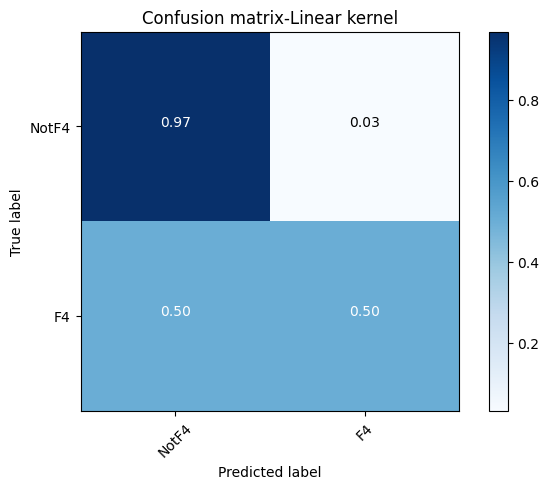

In [726]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NotF4', 'F4'], normalize= True,  title='Confusion matrix-Linear kernel')

In [ ]:
#f1 score
from sklearn.metrics import f1_score
f1_linear = f1_score(y_test, yhat, average=None) 

#jaccard 
from sklearn.metrics import jaccard_score
jac_linear = jaccard_score(y_test, yhat, average=None)

print ('f1:', f1_linear)
print ('jaccard:', jac_linear)

<i>F4 prediction not at 0, but also <b>not great</b>... high accuracy score mostly driven by predicting not-F4, not by predicting yes-F4.

<i>Let's try polynomial next.</i>

In [728]:
##Modeling
#kernel function: polynomial

#fit model
from sklearn import svm
bbmodel_p = svm.SVC(kernel='poly')
bbmodel_p.fit(X_train, y_train) 

#predict
yhat = bbmodel_p.predict(X_test)
yhat [0:3]

array([0, 0, 0])

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       126
           1       0.00      0.00      0.00        10

    accuracy                           0.93       136
   macro avg       0.46      0.50      0.48       136
weighted avg       0.86      0.93      0.89       136

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


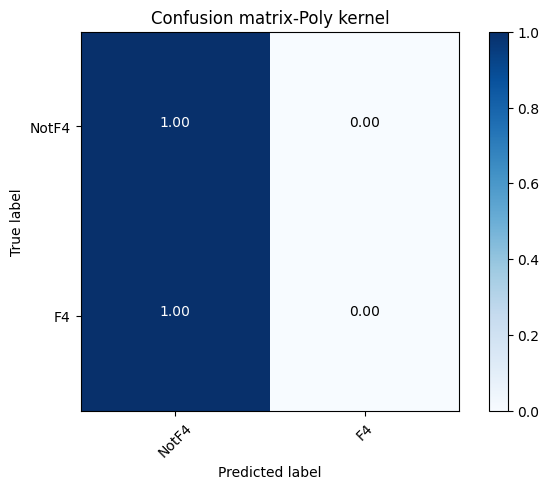

In [729]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NotF4', 'F4'], normalize= True,  title='Confusion matrix-Poly kernel')

In [548]:
#f1 score
from sklearn.metrics import f1_score
f1_poly = f1_score(y_test, yhat, average=None) 

#jaccard 
from sklearn.metrics import jaccard_score
jac_poly = jaccard_score(y_test, yhat, average=None)

print ('f1 linear:', f1_linear)
print ('jaccard linear:', jac_linear)
print ('f1 poly:', f1_poly)
print ('jaccard poly:', jac_poly)

f1 linear: [0.96 0.53]
jaccard linear: [0.93 0.36]
f1 poly: [0.96 0.  ]
jaccard poly: [0.93 0.  ]


<i><b>Nope.</b> Not good. Basically just labels everything as a 0 (not-F4) and calls it a day.

<i>How about RBF?</i>

In [730]:
##Modeling
#kernel function: Radial Basis Function (RBF)

#fit model
from sklearn import svm
bbmodel_rbf = svm.SVC(kernel='rbf')
bbmodel_rbf.fit(X_train, y_train) 

#predict
yhat = bbmodel_rbf.predict(X_test)
yhat [0:3]

array([0, 0, 0])

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       126
           1       0.00      0.00      0.00        10

    accuracy                           0.93       136
   macro avg       0.46      0.50      0.48       136
weighted avg       0.86      0.93      0.89       136

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


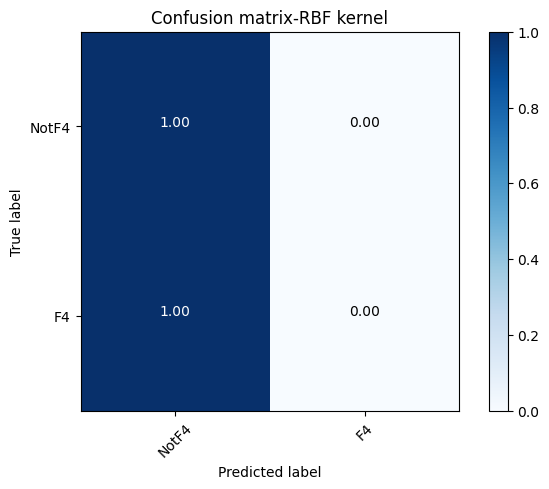

In [731]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NotF4', 'F4'],normalize= True,  title='Confusion matrix-RBF kernel')

In [732]:
#f1 score
from sklearn.metrics import f1_score
f1_rbf = f1_score(y_test, yhat, average=None) 

#jaccard 
from sklearn.metrics import jaccard_score
jac_rbf = jaccard_score(y_test, yhat, average=None)

print ('f1 linear:', f1_linear)
print ('jaccard linear:', jac_linear)
print ('f1 poly:', f1_poly)
print ('jaccard poly:', jac_poly)
print ('f1 rbf:', f1_rbf)
print ('jaccard rbf:', jac_rbf)

f1 linear: [0.96 0.53]
jaccard linear: [0.93 0.36]
f1 poly: [0.96 0.  ]
jaccard poly: [0.93 0.  ]
f1 rbf: [0.96 0.  ]
jaccard rbf: [0.93 0.  ]


<i>Also <b>not</b> good. Same issue as with the polynomial.

<i>Sigmoid next!</i>

In [733]:
##Modeling
#kernel function: sigmoid

#fit model
from sklearn import svm
bbmodel_sig = svm.SVC(kernel='sigmoid')
bbmodel_sig.fit(X_train, y_train) 

#predict
yhat = bbmodel_sig.predict(X_test)
yhat [0:3]

array([0, 0, 0])

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       126
           1       0.00      0.00      0.00        10

    accuracy                           0.93       136
   macro avg       0.46      0.50      0.48       136
weighted avg       0.86      0.93      0.89       136

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


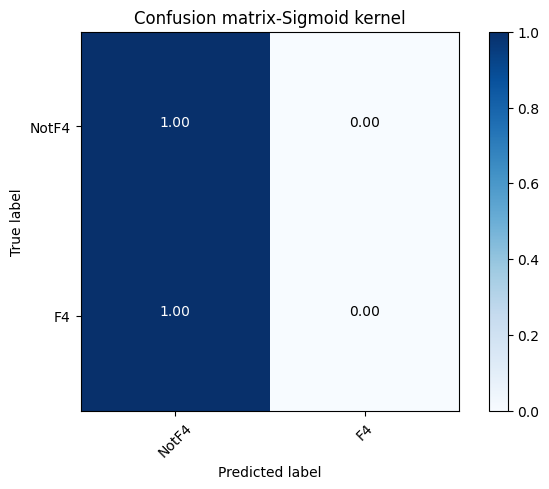

In [734]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NotF4', 'F4'],normalize= True,  title='Confusion matrix-Sigmoid kernel')


<i>Still <b>bad</b>! 

<i>Let's look at the metrics from all of the svm models.</i>

In [735]:
#f1 score
from sklearn.metrics import f1_score
f1_sig = f1_score(y_test, yhat, average=None) 

#jaccard 
from sklearn.metrics import jaccard_score
jac_sig = jaccard_score(y_test, yhat, average=None)

print ('f1 linear:', f1_linear)
print ('jaccard linear:', jac_linear)
print ('f1 poly:', f1_poly)
print ('jaccard poly:', jac_poly)
print ('f1 rbf:', f1_rbf)
print ('jaccard rbf:', jac_rbf)
print ('f1 sig:', f1_sig)
print ('jaccard rbf:', jac_sig)

f1 linear: [0.96 0.53]
jaccard linear: [0.93 0.36]
f1 poly: [0.96 0.  ]
jaccard poly: [0.93 0.  ]
f1 rbf: [0.96 0.  ]
jaccard rbf: [0.93 0.  ]
f1 sig: [0.96 0.  ]
jaccard rbf: [0.93 0.  ]


<i><b>Linear kernel wins!</b> Predicting F4 (as opposed to predicting NotF4) still not great though!

<i>Just for fun, let's look at the model coefficients for the linear model. We'll create a column with the absolute value of the coefficients and then sort by that column, so the table will be sorted by the magnitude of effect (whether positive or negative).</i>

In [758]:
#print (bbmodel_lin.coef_)
coefsvm = bbmodel_lin.coef_[0]

SVM2 = pd.DataFrame(X_SVM, columns = ['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex'])

coef_table_svm = pd.DataFrame(list(SVM2.columns)).copy()
coef_table_svm.insert(len(coef_table_svm.columns),"Coefs",bbmodel_lin.coef_.transpose())

coef_table_svm['Coefs2'] = coef_table_svm['Coefs'].abs()
coef_table_svm = coef_table_svm.sort_values(by=['Coefs2'], ascending = False)

coef_table_svm

,0,Coefs,Coefs2
1,W,0.611242,0.611242
0,G,0.447867,0.447867
13,2P_O,-0.392390,0.392390
18,WAB,-0.378587,0.378587
19,SEED,-0.217405,0.217405
7,TOR,0.151431,0.151431
10,DRB,0.127364,0.127364
5,EFG_O,-0.117237,0.117237
11,FTR,-0.085158,0.085158
6,EFG_D,-0.081288,0.081288


<i><b>Goals</b> still very important, just like in the Decision Tree. But some differences as well. And the Decision Tree had higher accuracy than linear SVM for both F4 and notF4.</i>

# Logistic Regression


<b>Question 5</b> Train a logistic regression model and determine the accuracy of the validation data (set C=0.01)


In [737]:
from sklearn.linear_model import LogisticRegression

In [738]:
df1['F4'] = np.where(df1.POSTSEASON == 'F4', 1, 0)
print (df1.head(5))
print (df1.shape)
print (df1.dtypes)

             TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Villanova   BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2      Notre Dame  ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3        Virginia  ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4          Kansas  B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   

   ...  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  windex  POSTSEASON2  \
0  ...  32.7  36.2   71.7   8.6          F4   1.0  2016    True           F4   
1  ...  36.2  33.9   66.7   8.9          F4   2.0  2016    True           F4   
2  ...  37.4  36.9   65.5   2.3          E8   6.0  2016   False           E8   
3  ...  40.3  34.7   61.9   8.6          E8   1.0  2016    True           E8   
4  ...  41.3  32.5   70.1  11.6          E8   1.0  2016    True           E8   

   F4  
0   1  
1   1  
2   0  
3   0  
4   0  

[5 rows

In [750]:
#just select numeric variables for factors
X_LR = df[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]

#set up outcome variable
y_LR = df['F4']

#Normalize data
X_LR = preprocessing.StandardScaler().fit(X_LR).transform(X_LR)
X_LR[0:5]

##Train & Test
X_train, X_test, y_train, y_test = train_test_split( X_LR, y_LR, test_size=0.5, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (136, 21) (136,)
Test set: (136, 21) (136,)


In [751]:
#fit with train set
#‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.
#C = inverse of regularization strength, small = stronger regularization (solves overfitting)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
#print(LR)

#predictions
yhat = LR.predict(X_test)
#print(yhat)

#estimates
#**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is #the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

yhat_prob = LR.predict_proba(X_test)
#print(yhat_prob)

#get coefficients
coef = LR.coef_[0]

<i>Let's get a <b>table of regression coefficients</b> so we can see which factors were most important for predicting F4 status. Again, we'll sort by magnitude of effect (using absolute value).</i>

In [759]:
#Get coefficients

X_LR2 = pd.DataFrame(X_LR, columns = ['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex'])

coef_table = pd.DataFrame(list(X_LR2.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",LR.coef_.transpose())

#order coefficients by biggest effect (positive or negative)
coef_table['Coefs2'] = coef_table['Coefs'].abs()
coef_table = coef_table.sort_values(by=['Coefs2'], ascending = False)

coef_table

,0,Coefs,Coefs2
0,G,0.083994,0.083994
1,W,0.055168,0.055168
3,ADJDE,-0.032449,0.032449
19,SEED,-0.032399,0.032399
10,DRB,-0.032326,0.032326
20,windex,0.025632,0.025632
12,FTRD,-0.023451,0.023451
13,2P_O,-0.019586,0.019586
9,ORB,-0.018271,0.018271
18,WAB,0.016315,0.016315


<i>Unsurprisingly <b>G</b> is very high--conforms with previous analyses. This model seems closer to the Decision Tree than the linear SVM, with the features picked out by the Decision Tree having fairly large effects.</i>

Confusion matrix, without normalization
[[  4   6]
 [  0 126]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       126
           1       1.00      0.40      0.57        10

    accuracy                           0.96       136
   macro avg       0.98      0.70      0.77       136
weighted avg       0.96      0.96      0.95       136



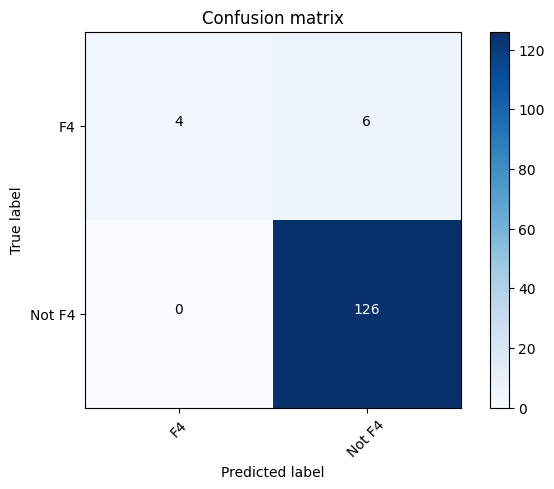

In [760]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['F4','Not F4'],normalize= False,  title='Confusion matrix')

#classification report (precision-TP/TP+FP recall-TP/TP+FN f1score (0-1) support)
print (classification_report(y_test, yhat))


In [761]:
#jaccard index
#size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted #labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it #is 0.0.
from sklearn.metrics import jaccard_score
js = jaccard_score(y_test, yhat,pos_label=0, average = None)
print('jaccard:', js)

#log loss
from sklearn.metrics import log_loss
ll = log_loss(y_test, yhat_prob)
print('log loss:', ll)

jaccard: [0.95 0.4 ]
log loss: 0.5072464009478252


<i>Not so bad. The full logistic regression model is slightly better than the linear SVM in terms of predicting F4 (in addition to predicting NotF4) but not as good as the Decision Tree.</i>

<i>Rather then just throwing everything into the model, let's try a reduced model with just the <b>top ten</b> factors. We'll count the ten factors with the largest absolute value of the regression coefficient in the previous model.</i>

In [762]:
#Refined model
#select top ten factors in previous model
X_LR_small = df[['G', 'W', 'ADJDE', 'SEED', 'DRB', 'windex', 'FTRD', '2P_O', 'ORB', 'WAB']]

#set up outcome variable
y_LR_small = df['F4']

#Normalize data
X_LR_small = preprocessing.StandardScaler().fit(X_LR_small).transform(X_LR_small)
X_LR_small[0:5]

##Train & Test
X_train, X_test, y_train, y_test = train_test_split( X_LR_small, y_LR_small, test_size=0.5, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#fit with train set
#‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.
#C = inverse of regularization strength, small = stronger regularization (solves overfitting)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_small = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
#print(LR_small)

#predictions
yhat2 = LR_small.predict(X_test)
#print(yhat2)

#estimates
#**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is #the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

yhat_prob2 = LR_small.predict_proba(X_test)
#print(yhat_prob2)

#get coefficients
#coef = LR_small.coef_[0]
#print(coef)
X_LR_small2 = pd.DataFrame(X_LR_small, columns = ['G', 'W', 'ADJDE', 'SEED', 'DRB', 'windex', 'FTRD', '2P_O', 'ORB', 'WAB'])

coef_table2 = pd.DataFrame(list(X_LR_small2.columns)).copy()
coef_table2.insert(len(coef_table2.columns),"Coefs",LR_small.coef_.transpose())
coef_table2['Coefs2'] = coef_table2['Coefs'].abs()
coef_table2.sort_values(by=['Coefs2'], ascending = False)

print(coef_table2)

Train set: (136, 10) (136,)
Test set: (136, 10) (136,)
        0     Coefs    Coefs2
0       G  0.083592  0.083592
1       W  0.053590  0.053590
2   ADJDE -0.034582  0.034582
3    SEED -0.031837  0.031837
4     DRB -0.034307  0.034307
5  windex  0.026048  0.026048
6    FTRD -0.024288  0.024288
7    2P_O -0.023128  0.023128
8     ORB -0.016015  0.016015
9     WAB  0.015278  0.015278


Confusion matrix, without normalization
[[  6   4]
 [  0 126]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       126
           1       1.00      0.60      0.75        10

    accuracy                           0.97       136
   macro avg       0.98      0.80      0.87       136
weighted avg       0.97      0.97      0.97       136

large model jaccard: [0.95 0.4 ]
small model jaccard: [0.97 0.6 ]
large model log loss: 0.5072464009478252
small model log loss: 0.5049075555759295


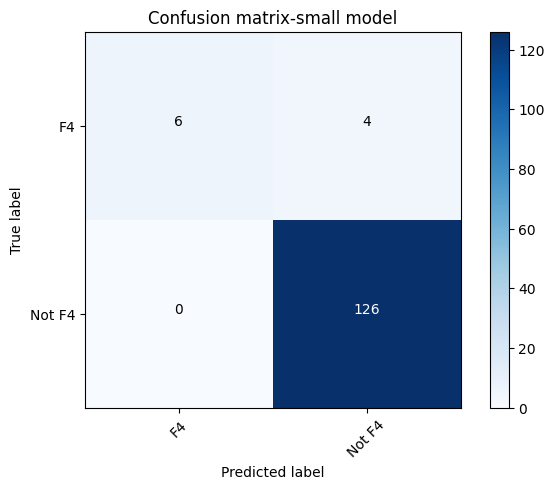

In [764]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['F4','Not F4'],normalize= False,  title='Confusion matrix-small model')

#classification report (precision-TP/TP+FP recall-TP/TP+FN f1score (0-1) support)
print (classification_report(y_test, yhat2))

#jaccard index
#size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted #labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it #is 0.0.
from sklearn.metrics import jaccard_score
js2 = jaccard_score(y_test, yhat2,pos_label=0, average = None)
print('large model jaccard:', js)
print('small model jaccard:', js2)

#log loss
from sklearn.metrics import log_loss
ll2 = log_loss(y_test, yhat_prob2)
print('large model log loss:', ll)
print('small model log loss:', ll2)

<i><b>Hey this one is pretty good!</b>

<i>Let's try an even smaller one, with the <b>top six</b> factors as predictors.</i>

In [765]:
#Refined model
#select top six factors in previous model
X_LR_smaller = df[['G', 'W', 'ADJDE', 'SEED', 'DRB', 'windex']]

#set up outcome variable
y_LR_smaller = df['F4']

#Normalize data
X_LR_smaller = preprocessing.StandardScaler().fit(X_LR_smaller).transform(X_LR_smaller)
X_LR_smaller[0:5]

##Train & Test
X_train, X_test, y_train, y_test = train_test_split( X_LR_smaller, y_LR_smaller, test_size=0.5, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#fit with train set
#‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.
#C = inverse of regularization strength, small = stronger regularization (solves overfitting)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_smaller = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
#print(LR_smaller)

#predictions
yhat3 = LR_smaller.predict(X_test)
#print(yhat3)

#estimates
#**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is #the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

yhat_prob3 = LR_smaller.predict_proba(X_test)
#print(yhat_prob3)

#get coefficients
#coef = LR_smaller.coef_[0]
#print(coef)
X_LR_smaller2 = pd.DataFrame(X_LR_smaller, columns = ['G', 'W', 'ADJDE', 'SEED', 'DRB', 'windex'])

coef_table3 = pd.DataFrame(list(X_LR_smaller2.columns)).copy()
coef_table3.insert(len(coef_table3.columns),"Coefs",LR_smaller.coef_.transpose())
coef_table3['Coefs2'] = coef_table3['Coefs'].abs()
coef_table3.sort_values(by=['Coefs2'], ascending = False)

print(coef_table3)

Train set: (136, 6) (136,)
Test set: (136, 6) (136,)
        0     Coefs    Coefs2
0       G  0.085663  0.085663
1       W  0.052686  0.052686
2   ADJDE -0.035818  0.035818
3    SEED -0.033288  0.033288
4     DRB -0.034329  0.034329
5  windex  0.026813  0.026813


Confusion matrix, without normalization
[[  6   4]
 [  0 126]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       126
           1       1.00      0.60      0.75        10

    accuracy                           0.97       136
   macro avg       0.98      0.80      0.87       136
weighted avg       0.97      0.97      0.97       136

large model jaccard: [0.95 0.4 ]
small model jaccard: [0.97 0.6 ]
smallest model jaccard: [0.97 0.6 ]
large model log loss: 0.5072464009478252
small model log loss: 0.5049075555759295
smallest model log loss: 0.5038300231569152


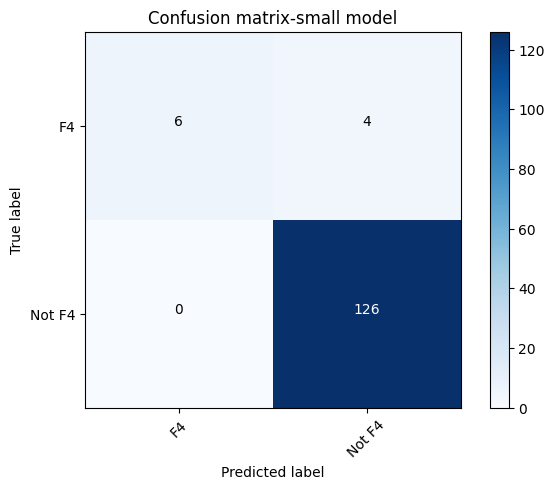

In [767]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat3, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['F4','Not F4'],normalize= False,  title='Confusion matrix-small model')

#classification report (precision-TP/TP+FP recall-TP/TP+FN f1score (0-1) support)
print (classification_report(y_test, yhat3))

#jaccard index
#size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted #labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it #is 0.0.
from sklearn.metrics import jaccard_score
js3 = jaccard_score(y_test, yhat3,pos_label=0, average = None)
print('large model jaccard:', js)
print('small model jaccard:', js2)
print('smallest model jaccard:', js3)

#log loss
from sklearn.metrics import log_loss
ll3 = log_loss(y_test, yhat_prob3)
print('large model log loss:', ll)
print('small model log loss:', ll2)
print('smallest model log loss:', ll3)


<i><b>Smallest model</b> has slightly less logloss but otherwise is very similar to small model.

<i>Both 10-factor and 6-factor model more accurate than all-factor model. 

<i>In particular, the smaller models are better at getting 1 (F4) cases correct, rather than deriving accuracy from the more numerous 0 (non-F4) cases.

<i>Now, let's try a model with the <b>four factors picked out by our favored decision tree model</b> (tree4).

In [784]:
#Now let's try a model with the four factors picked out by our favored decision tree model (tree4)

X_LR_treelog = df[['G', '2P_O', '2P_D', 'DRB']]

#set up outcome variable
y_LR_treelog = df['F4']

#Normalize data
X_LR_treelog = preprocessing.StandardScaler().fit(X_LR_treelog).transform(X_LR_treelog)
X_LR_treelog[0:5]

##Train & Test
X_train, X_test, y_train, y_test = train_test_split( X_LR_treelog, y_LR_treelog, test_size=0.5, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#fit with train set
#‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.
#C = inverse of regularization strength, small = stronger regularization (solves overfitting)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_treelog = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
#print(LR_treelog)

#predictions
yhat4 = LR_treelog.predict(X_test)
#print(yhat4)

#estimates
#**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is #the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

yhat_prob4 = LR_treelog.predict_proba(X_test)
#print(yhat_prob4)

#get coefficients
#coef = LR_treelog.coef_[0]
#print(coef)
X_LR_treelog2 = pd.DataFrame(X_LR_treelog, columns = ['G', '2P_O', '2P_D', 'DRB'])

coef_table4 = pd.DataFrame(list(X_LR_treelog2.columns)).copy()
coef_table4.insert(len(coef_table4.columns),"Coefs",LR_treelog.coef_.transpose())
coef_table4['Coefs2'] = coef_table4['Coefs'].abs()
coef_table4.sort_values(by=['Coefs2'], ascending = False)

print(coef_table4)

Train set: (136, 4) (136,)
Test set: (136, 4) (136,)
      0     Coefs    Coefs2
0     G  0.101340  0.101340
1  2P_O -0.013417  0.013417
2  2P_D -0.023786  0.023786
3   DRB -0.041113  0.041113


Confusion matrix, without normalization
[[  0  10]
 [  0 126]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       126
           1       0.00      0.00      0.00        10

    accuracy                           0.93       136
   macro avg       0.46      0.50      0.48       136
weighted avg       0.86      0.93      0.89       136

large model jaccard: [0.95 0.4 ]
small model jaccard: [0.97 0.6 ]
smallest model jaccard: [0.97 0.6 ]
tree model jaccard: 0.9264705882352942
large model log loss: 0.5072464009478252
small model log loss: 0.5049075555759295
smallest model log loss: 0.5038300231569152
tree model log loss: 0.5134785750017166


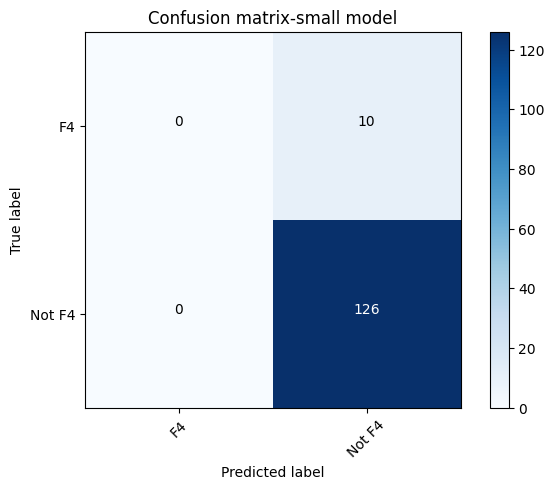

In [769]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat4, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['F4','Not F4'],normalize= False,  title='Confusion matrix-small model')

#classification report (precision-TP/TP+FP recall-TP/TP+FN f1score (0-1) support)
print (classification_report(y_test, yhat4))

#jaccard index
#size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted #labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it #is 0.0.
from sklearn.metrics import jaccard_score
jstree = jaccard_score(y_test, yhat4,pos_label=0)
print('large model jaccard:', js)
print('small model jaccard:', js2)
print('smallest model jaccard:', js3)
print('tree model jaccard:', jstree)

#log loss
from sklearn.metrics import log_loss
lltree = log_loss(y_test, yhat_prob4)
print('large model log loss:', ll)
print('small model log loss:', ll2)
print('smallest model log loss:', ll3)
print('tree model log loss:', lltree)


<i><b>TURNS OUT IT DOES A TERRIBLE JOB!</b> 

<i>Just for fun, let's try a model with just "Goals" next because that really seems to (surprise surprise) be the biggest factor

In [770]:
#Just goals

X_LR_justgoals = df[['G']]

#set up outcome variable
y_LR_justgoals = df['F4']

#Normalize data
X_LR_justgoals = preprocessing.StandardScaler().fit(X_LR_justgoals).transform(X_LR_justgoals)
X_LR_justgoals[0:5]

##Train & Test
X_train, X_test, y_train, y_test = train_test_split( X_LR_justgoals, y_LR_justgoals, test_size=0.5, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#fit with train set
#‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.
#C = inverse of regularization strength, small = stronger regularization (solves overfitting)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_justgoals = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
#print(LR_justgoals)

#predictions
yhat5 = LR_justgoals.predict(X_test)
#print(yhat5)

#estimates
#**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is #the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

yhat_prob5 = LR_justgoals.predict_proba(X_test)
#print(yhat_prob5)

#get coefficients
#coef = LR_justgoals.coef_[0]
#print(coef)
X_LR_justgoals2 = pd.DataFrame(X_LR_justgoals, columns = ['G'])

coef_table5 = pd.DataFrame(list(X_LR_justgoals2.columns)).copy()
coef_table5.insert(len(coef_table5.columns),"Coefs",LR_justgoals.coef_.transpose())
coef_table5['Coefs2'] = coef_table5['Coefs'].abs()
coef_table5.sort_values(by=['Coefs2'], ascending = False)

print(coef_table5)

Train set: (136, 1) (136,)
Test set: (136, 1) (136,)
   0     Coefs    Coefs2
0  G  0.102446  0.102446


Confusion matrix, without normalization
[[  0  10]
 [  0 126]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       126
           1       0.00      0.00      0.00        10

    accuracy                           0.93       136
   macro avg       0.46      0.50      0.48       136
weighted avg       0.86      0.93      0.89       136

large model jaccard: [0.95 0.4 ]
small model jaccard: [0.97 0.6 ]
smallest model jaccard: [0.97 0.6 ]
tree model jaccard: 0.9264705882352942
just goals model jaccard: 0.9264705882352942
large model log loss: 0.5072464009478252
small model log loss: 0.5049075555759295
smallest model log loss: 0.5038300231569152
tree model log loss: 0.5134785750017166
just goals model log loss: 0.5100713277438379


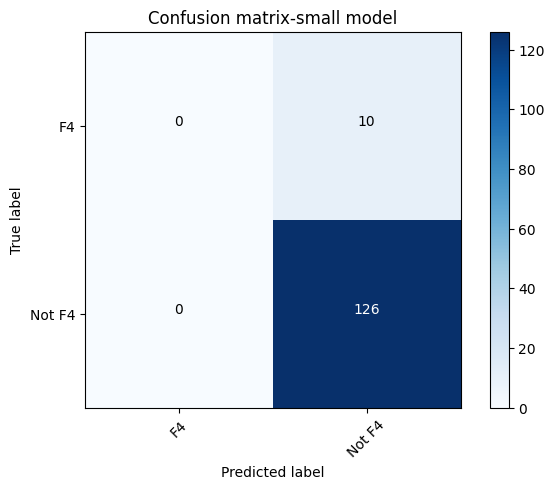

In [771]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat5, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['F4','Not F4'],normalize= False,  title='Confusion matrix-small model')

#classification report (precision-TP/TP+FP recall-TP/TP+FN f1score (0-1) support)
print (classification_report(y_test, yhat5))

#jaccard index
#size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted #labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it #is 0.0.
from sklearn.metrics import jaccard_score
jsgoals = jaccard_score(y_test, yhat5,pos_label=0)
print('large model jaccard:', js)
print('small model jaccard:', js2)
print('smallest model jaccard:', js3)
print('tree model jaccard:', jstree)
print('just goals model jaccard:', jsgoals)

#log loss
from sklearn.metrics import log_loss
llgoals = log_loss(y_test, yhat_prob5)
print('large model log loss:', ll)
print('small model log loss:', ll2)
print('smallest model log loss:', ll3)
print('tree model log loss:', lltree)
print('just goals model log loss:', llgoals)

<i>JUST GOALS ALSO DOES A TERRIBLE JOB but also about the same as the model based on decision-tree factors, so let's use the <b>six-factor model</b>, which was our best with the smallest number of factors.</i>

<b>Question  5</b> Calculate the  F1 score and Jaccard score for each model from above. Use the Hyperparameter that performed best on the validation data. **For f1\_score please set the average parameter to 'micro'.**


In [772]:
from sklearn.metrics import f1_score
# for f1_score please set the average parameter to 'micro'
from sklearn.metrics import log_loss

In [773]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

### Load Test set for evaluation


In [774]:
await download("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv", "basketball_train.csv")
test_df = pd.read_csv("basketball_train.csv")
test_df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


<i><b>Notes Redux</b>

<i>I adjusted the code below to fit in with the adjustments I made above given the instructions for the assignment.

<i>This includes setting the outcome variable as binary: whether or not the team made it to the Final Four (including Champions and 2nd place in the Final Four teams). Ambiguous aspects of the assignment (e.g., whether or not to use only use S16 or higher) were ignored. I used all the data. 

In [775]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')

#create outcome variable POSTSEASON2 that groups Champions and 2nd in with F4; drop NaNs
test_df['POSTSEASON2'] = np.where(test_df.POSTSEASON == 'Champions','F4', test_df['POSTSEASON'])
test_df['POSTSEASON2'] = np.where(test_df.POSTSEASON == '2ND','F4', test_df['POSTSEASON2'])
test_df = test_df.loc[test_df['POSTSEASON2'].str.contains('F4|S16|E8|R32|R64|R68', na=False)]

#create outcome variable that predicts binary outcome--F4 or not
test_df['F4'] = np.where(test_df.POSTSEASON2 == 'F4', 1, 0)

#test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)

test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

array([[ 2.6 ,  1.96,  1.79, -0.4 ,  0.92,  0.05,  0.04, -1.13, -0.3 ,
         2.3 ,  0.5 , -0.76, -0.41,  0.8 , -0.79, -1.38,  1.37,  1.1 ,
         1.42, -1.67,  2.63],
       [ 2.6 ,  2.44,  1.76, -1.16,  1.02,  1.35, -0.55, -0.61,  0.75,
        -0.71,  0.29, -0.39, -0.48,  1.97, -0.95,  0.03,  0.27, -0.44,
         1.48, -1.46,  2.63],
       [ 0.78, -0.17,  1.01,  1.21,  0.19,  0.57,  0.63, -1.19, -1.78,
         0.38,  1.22, -0.63, -1.18,  0.47, -0.14,  0.51,  1.71, -0.81,
         0.17, -0.6 , -0.38],
       [ 1.24,  1.02,  1.26, -1.14,  0.96,  0.87,  0.17, -1.31, -0.04,
        -0.3 , -1.16, -0.8 ,  0.11,  0.37, -0.21,  1.67,  0.65, -1.92,
         1.42, -1.67,  2.63],
       [ 1.24,  1.73,  1.42, -1.26,  1.  ,  1.2 , -1.22,  0.26, -0.17,
         0.26, -0.23,  0.54,  0.79,  0.4 , -1.19,  2.07, -0.4 ,  0.61,
         2.02, -1.67,  2.63]])

In [776]:
test_Feature.head()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,...,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,1.0,1
1,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,20.6,28.2,...,34.1,30.0,57.4,44.1,36.2,33.9,66.7,8.9,2.0,1
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1


In [777]:
test_y = test_df['F4'].values
test_y[0:50]

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

KNN


In [778]:
#knn2 model from above

#test model
yhat2 = knn2.predict(test_X)
yhat2[0:5]

#accuracy 
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score

acc_knn2 = accuracy_score(test_y, yhat2)
print ("Acc score for knn2:", acc_knn2)

f1_knn2 = f1_score(test_y, yhat2, average='micro')
f1_knn2_unav = f1_score(test_y, yhat2, average=None)
print ("F1 for knn2:", f1_knn2) 
print ("Unaveraged F1 for knn2:", f1_knn2_unav) 

#jaccard 
jac_knn2_avg = jaccard_score(test_y, yhat2, average='micro')
print("Jaccard for knn2:", jac_knn2_avg)
jac_knn2 = jaccard_score(test_y, yhat2, average=None)
print("Unaveraged Jaccard for knn2:", jac_knn2)

Acc score for knn2: 0.9441176470588235
F1 for knn2: 0.9441176470588235
Unaveraged F1 for knn2: [0.97 0.1 ]
Jaccard for knn2: 0.8941504178272981
Unaveraged Jaccard for knn2: [0.94 0.05]


Decision Tree


In [779]:
#tree4 model from above

#test model
predTree4 = tree4.predict(test_X)
predTree4[0:5]

#accuracy 
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score

acc_tree4 = accuracy_score(test_y, predTree4)
print ("Acc score for tree4:", acc_tree4)

f1_tree4 = f1_score(test_y, predTree4, average='micro')
f1_tree4_unav = f1_score(test_y, predTree4, average=None)
print ("F1 for tree4:", f1_tree4) 
print("Unaveraged F1 for tree4:", f1_tree4_unav)

#jaccard 
jac_tree4_avg = jaccard_score(test_y, predTree4, average='micro')
print("Jaccard for tree4:", jac_tree4_avg)
jac_tree4 = jaccard_score(test_y, predTree4, average=None)
print("Unaveraged Jaccard for tree4:", jac_tree4)


Acc score for tree4: 0.9735294117647059
F1 for tree4: 0.9735294117647059
Unaveraged F1 for tree4: [0.99 0.77]
Jaccard for tree4: 0.9484240687679083
Unaveraged Jaccard for tree4: [0.97 0.62]


SVM


In [780]:
#linear svm model from above

#predict
yhatsvm = bbmodel_lin.predict(test_X)
yhatsvm [0:3]

#acc
from sklearn.metrics import accuracy_score
acc_linearsvm = accuracy_score(test_y, yhatsvm)
print ("Acc score for svm linear model:", acc_linearsvm)

#f1 score
from sklearn.metrics import f1_score
f1_linearsvm = f1_score(test_y, yhatsvm, average='micro') 
f1_linearsvm_unav = f1_score(test_y, yhatsvm, average=None) 
print ('f1 for svm linear model:', f1_linearsvm)
print ('Unaveraged f1 for svm linear model:', f1_linearsvm_unav)

#jaccard 
from sklearn.metrics import jaccard_score
jac_linearsvm_avg = jaccard_score(test_y, yhatsvm, average='micro')
print ('Jaccard for svm linear model:', jac_linearsvm_avg)
jac_linearsvm = jaccard_score(test_y, yhatsvm, average=None)
print ('Unaveraged Jaccard for svm linear model:', jac_linearsvm)



Acc score for svm linear model: 0.9411764705882353
f1 for svm linear model: 0.9411764705882353
Unaveraged f1 for svm linear model: [0.97 0.  ]
Jaccard for svm linear model: 0.8888888888888888
Unaveraged Jaccard for svm linear model: [0.94 0.  ]


Logistic Regression


In [781]:
#six-factor logistic regression model from above

#reduce to six factors
test_Featurelog = test_df[['G', 'W','ADJDE', 'SEED', 'DRB','windex']]
test_Featurelog['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)

test_Xlog = test_Featurelog
test_Xlog = preprocessing.StandardScaler().fit(test_Xlog).transform(test_Xlog)
test_Xlog[0:5]

#predict
yhatlog = LR_smaller.predict(test_Xlog)
yhatlog [0:3]

#acc
from sklearn.metrics import accuracy_score
acc_log = accuracy_score(test_y, yhatlog)
print ("Acc score for knn2:", acc_log)

#f1 score
from sklearn.metrics import f1_score
f1_log = f1_score(test_y, yhatlog, average='micro') 
f1_log_unav = f1_score(test_y, yhatlog, average=None) 
print ('f1 for logisic regression model:', f1_log)
print('Unaveraged f1 for logisic regression model:', f1_log_unav)

#jaccard 
from sklearn.metrics import jaccard_score
jac_log = jaccard_score(test_y, yhatlog, average='micro')
print ('Jaccard for logistic regression model:', jac_log)
jac_log_unav = jaccard_score(test_y, yhatlog, average=None)
print ('Unaveraged Jaccard for logistic regression model:', jac_log_unav)

#log loss
from sklearn.metrics import log_loss
ll_log = log_loss(test_y, yhatlog)
print ('Log loss:', ll_log)

Acc score for knn2: 0.9588235294117647
f1 for logisic regression model: 0.9588235294117647
Unaveraged f1 for logisic regression model: [0.98 0.5 ]
Jaccard for logistic regression model: 0.9209039548022598
Unaveraged Jaccard for logistic regression model: [0.96 0.33]
Log loss: 1.48415043366953


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Accuracy | Jaccard | F1-score | LogLoss |
| ------------------ | -------- | ------- | -------- | ------- |
| KNN                | ?        | ?       | ?        | NA      |
| Decision Tree      | ?        | ?       | ?        | NA      |
| SVM                | ?        | ?       | ?        | NA      |
| LogisticRegression | ?        | ?       | ?        | ?       |


In [636]:
import jinja2

finaltable = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Jaccard', 'F1-score', 'LogLoss' ])
finaltable['Algorithm'] = ['KNN', 'DecisionTree', 'SVM', 'LogisticRegression']
finaltable['Accuracy'] = [acc_knn2, acc_tree4, acc_linearsvm, acc_log]
finaltable['Jaccard'] = [jac_knn2_avg, jac_tree4_avg, jac_linearsvm_avg, jac_log]
finaltable['F1-score'] = [f1_knn2, f1_tree4, f1_linearsvm, f1_log]
finaltable['LogLoss'] = ['NA', 'NA', 'NA', ll_log]
finaltable = finaltable.style.hide_index() 
finaltable

Algorithm,Accuracy,Jaccard,F1-score,LogLoss
KNN,0.944118,0.894150,0.944118,NA
DecisionTree,0.964706,0.931818,0.964706,NA
SVM,0.941176,0.888889,0.941176,NA
LogisticRegression,0.958824,0.920904,0.958824,1.484150


In [782]:
#table with unaveraged values
import jinja2

finaltable_unav = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Jaccard', 'F1-score'])
finaltable_unav['Algorithm'] = ['KNN', 'DecisionTree', 'SVM', 'LogisticRegression']
finaltable_unav['Accuracy'] = [acc_knn2, acc_tree4, acc_linearsvm, acc_log]
finaltable_unav['Jaccard'] = [jac_knn2, jac_tree4, jac_linearsvm, jac_log_unav]
finaltable_unav['F1-score'] = [f1_knn2_unav, f1_tree4_unav, f1_linearsvm_unav, f1_log_unav]
finaltable_unav = finaltable_unav.style.hide_index() 
finaltable_unav

Algorithm,Accuracy,Jaccard,F1-score
KNN,0.944118,[0.94 0.05],[0.97 0.1 ]
DecisionTree,0.973529,[0.97 0.62],[0.99 0.77]
SVM,0.941176,[0.94 0. ],[0.97 0. ]
LogisticRegression,0.958824,[0.96 0.33],[0.98 0.5 ]


<i><b>SUMMARY</b>

<i>The most accurate model for predicting both F4 and Not-F4 the <b>Decision Tree</b> model, with the logistic regression small model in second. These two also have the highest averaged accuracy scores.

<i>The KNN and SVM models in particular seemed quite susceptible to the large amount of 0s, favoring predicting 0s over predicting 1s.

Something to keep in mind when creating models to predict the results of basketball tournaments or sports in general is that is quite hard due to so many factors influencing the game. Even in sports betting an accuracy of 55% and over is considered good as it indicates profits.


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>


### Thank you for completing this lab!

## Author

Saeed Aghabozorgi

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                       |
| ----------------- | ------- | ------------- | ---------------------------------------- |
| 2022-11-29        | 2.2     | Anita Verma   | Converted initial version to Jupyterlite |
| 2021-04-03        | 2.1     | Malika Singla | Updated the Report accuracy              |
| 2020-08-27        | 2.0     | Lavanya       | Moved lab to course repo in GitLab       |
|                   |         |               |                                          |
|                   |         |               |                                          |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
